In [1]:
from transformers import ViTImageProcessor, ViTModel
from PIL import Image
import requests
from matplotlib import pyplot as plt
import pickle as pkl
import numpy as np
import cv2
import torch

/home/codespace/.python/current/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224-in21k')

In [3]:
model = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k')

In [4]:
X, y,a,b = pkl.load(open("train_set.pkl","rb"))
Xt, yt,at,bt = pkl.load(open("test_set.pkl","rb"))

In [5]:
def feature_extraction(input_features):
    features = []
    for x in input_features:
        features.append(model(**processor(images=np.stack((x,)*3, axis=-1), return_tensors="pt")).last_hidden_state)
    return features

In [6]:
X_train = feature_extraction(X[:5000])

: 

In [91]:
inputs = processor(images=np.stack((X[0],)*3, axis=-1), return_tensors="pt")

outputs = model(**inputs)
last_hidden_states = outputs.last_hidden_state

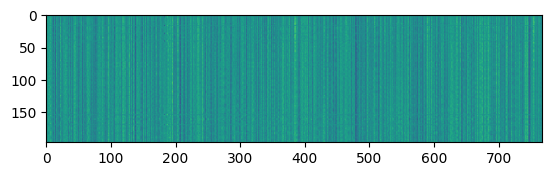

In [93]:
plt.imshow(ts[0][0].detach())